<a href="https://colab.research.google.com/github/kjhannah0626/Colab/blob/main/KIM_Jeonghyeon_Final_Project%20(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# core packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# normalizing X variables
from sklearn.preprocessing import StandardScaler

# classification algorithms
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump, load

# model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

# MAE, MSE, RMSE
from sklearn import metrics
import numpy as np

#Max Leaf Nodes
from sklearn.metrics import mean_absolute_error

# Data Understanding / Preparation

In [2]:
df = pd.read_excel("/content/Real_Estate.xlsx")
df.drop('No',axis=1, inplace=True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#rename data
dfR = df.rename(columns={"X1 transaction date":"date",
                         "X2 house age":"age",
                         "X3 distance to the nearest MRT station":"MRT",
                         "X4 number of convenience stores":"store",
                         "X5 latitude":"latitude",
                         "X6 longitude":"longitude",
                         "Y house price of unit area":"price"})
dfR.head()

,date,age,MRT,store,latitude,longitude,price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


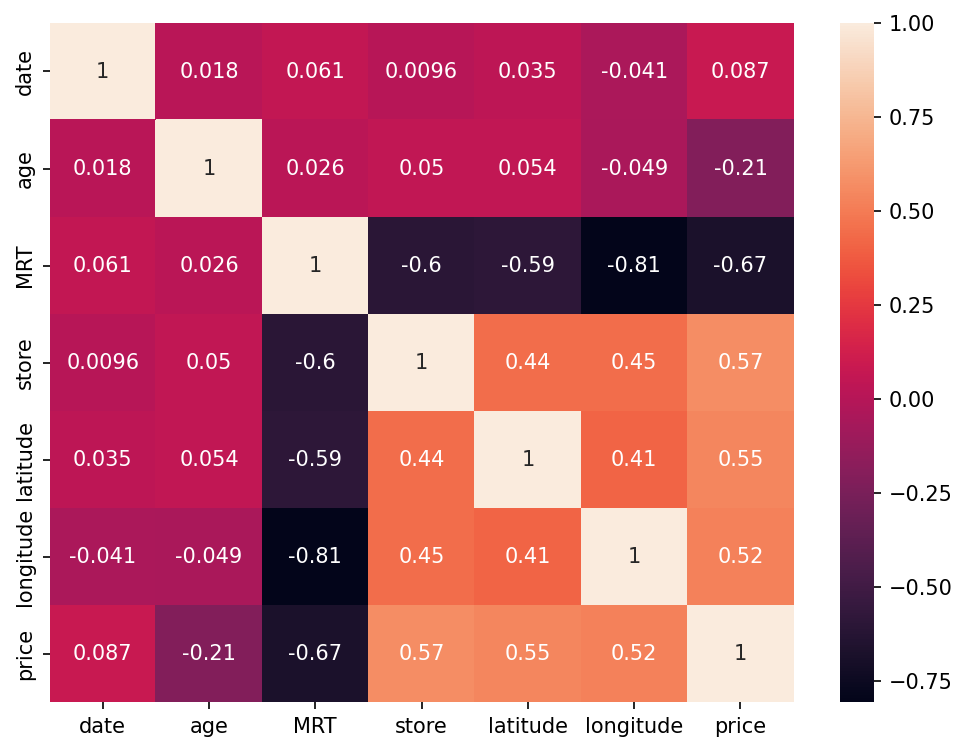

In [4]:
#visualization
plt.figure(figsize=(8,6),dpi =150)
sns.heatmap(dfR.corr(),annot =True);

In [ ]:
# from this table graph, it could be seen that MRT has the highest relationship with the price among the six different values.

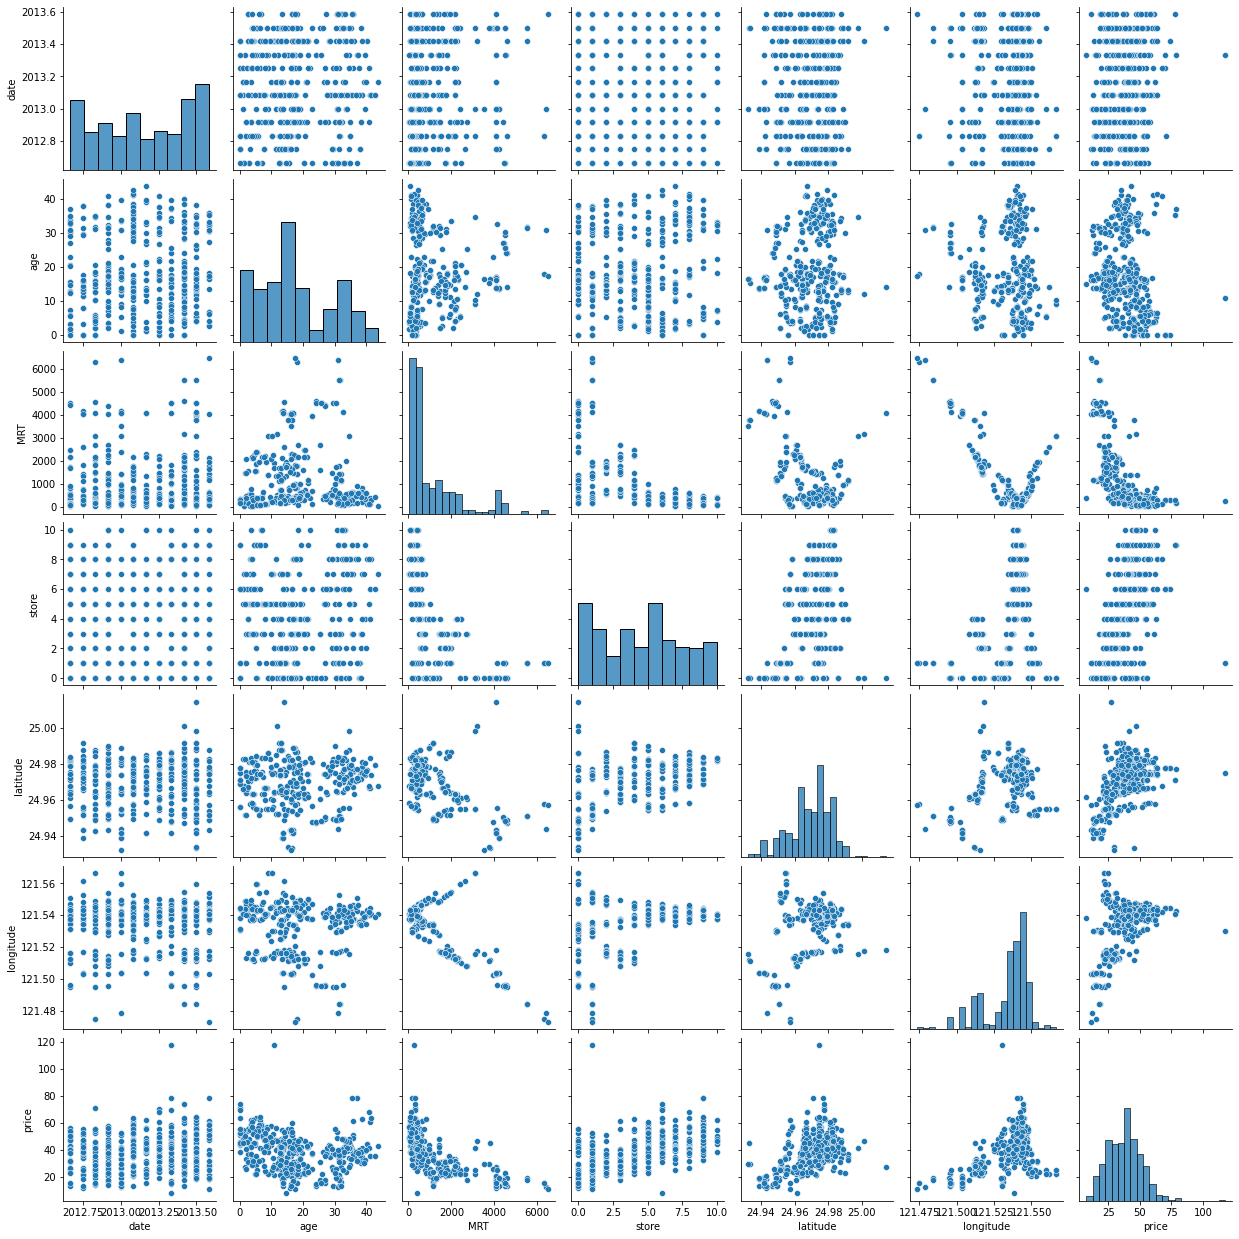

In [28]:
sns.pairplot(dfR);

#Model Development / Validation / Evaluation

In [36]:
#define X,y
y = dfR.price
X = dfR.drop('price',axis = 1)

In [37]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(331, 6) (331,) (83, 6) (83,)


# Classifier Errors

In [8]:
#SVC
svc = SVC()
param_grid = {'C':[0.001,0.01,0.1,0.5,1]}
grid = GridSearchCV(svc,param_grid)
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 716, in _validate_targets
    check_classification_targets(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils

ValueError: ignored

In [9]:
#KNeighborsClassifier
test_error_rates = []
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train,y_train)
y_prediction = knn_model.predict(X_test)
test_error = 1- accuracy_score(y_test , y_prediction)
test_error_rates.append(test_error)

NameError: ignored

In [10]:
#logisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

ValueError: ignored

#  Regression Method

## Linear Regression

In [26]:
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

# using mean_squared_error
predicted_home_prices = lm_model.predict(X_test)
mean_squared_error(y_test, predicted_home_prices)

49.38183321688771

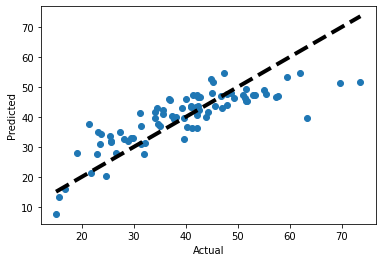

In [27]:
plt.subplots()
plt.scatter(y_test, predicted_home_prices)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   
plt.xlabel('Actual')
plt.ylabel('Predicted');

## Logarithmic Regression (MRT)

In [ ]:
# logarithmic regression cannot be done with many vaues, so MRT was chosen since it showed the most coefficiency before in the visualization table.

In [7]:
X_train_log  = np.log(X_train['MRT']).values.reshape(-1,1)
X_test_log = np.log(X_test['MRT']).values.reshape(-1,1)
y_train_log = y_train.values
y_test_log = y_test.values

In [8]:
y_pred_log= LinearRegression()
y_pred_log.fit(X_train_log, y_train_log)

# using mean_squared_error
predicted_home_prices =y_pred_log.predict(X_test_log)
mean_squared_error(y_test_log, predicted_home_prices)

57.343490090448256

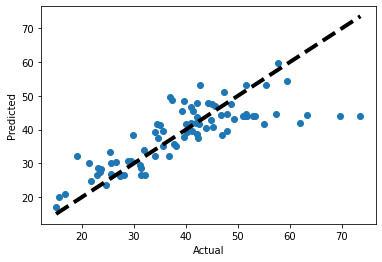

In [9]:
plt.subplots()
plt.scatter(y_test_log, predicted_home_prices)       
plt.plot([y_test_log.min(), y_test_log.max()], [y_test_log.min(), y_test_log.max()], 'k--', lw=4)   
plt.xlabel('Actual')
plt.ylabel('Predicted');

## Linear Regression (MRT)

In [ ]:
# this was to see if accuracy of logarithmic regression will go higher compared to linear regression when both of them only have MRT as the value.

In [13]:
lm_model = LinearRegression()
lm_model.fit(X_train ['MRT'].values.reshape(-1,1), y_train)

# using mean_squared_error
predicted_home_prices = lm_model.predict(X_test['MRT'].values.reshape(-1,1))
mean_squared_error(y_test, predicted_home_prices)

73.37480616447695

In [ ]:
#comparing mean squared errors of linear and logarithmic regressions using only MRT, it has been proven that logarithmic regression can higher the accuracy.

## Polynomial Regression

In [29]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)

poly_features=polynomial_converter.fit(X)
poly_features=polynomial_converter.transform(X)

In [38]:
#train test split
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(poly_features, y, test_size=0.2, random_state=100)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(331, 6) (331,) (83, 6) (83,)


In [40]:
polymodel=LinearRegression()
polymodel.fit(X_train_poly, y_train_poly)

# using mean_squared_error
predicted_home_prices = polymodel.predict(X_test_poly)
metrics.mean_squared_error(y_test,predicted_home_prices)

37.26905729122783

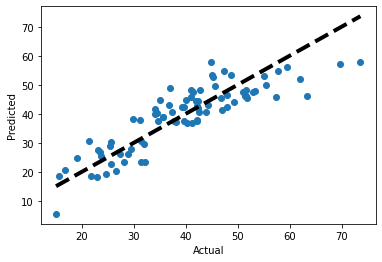

In [41]:
plt.subplots()
plt.scatter(y_test, predicted_home_prices)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   
plt.xlabel('Actual')
plt.ylabel('Predicted');

## DecisionTreeRegressor

In [42]:
dfR_model = DecisionTreeRegressor(random_state=1)
dfR_model.fit(X_train, y_train)

# using mean_squared_error
predicted_home_prices = dfR_model.predict(X_test)
mean_squared_error(y_test, predicted_home_prices)

60.99569277108433

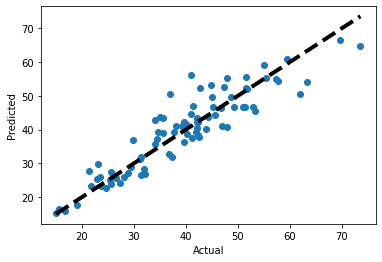

In [50]:
plt.subplots()
plt.scatter(y_test, predicted_home_prices)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   
plt.xlabel('Actual')
plt.ylabel('Predicted');

## RandomForestRegressor

In [51]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(X_train, y_train)

# using mean_squared_error
predicted_home_prices = forest_model.predict(X_test)
mean_squared_error(y_test, predicted_home_prices)

23.59673481485972

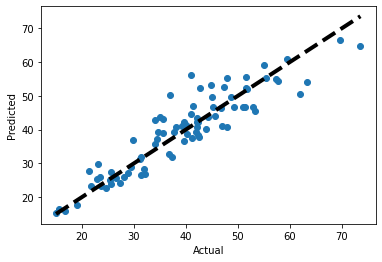

In [52]:
plt.subplots()
plt.scatter(y_test, predicted_home_prices)       
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)   
plt.xlabel('Actual')
plt.ylabel('Predicted');

# Normalized Data

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train_poly)

scaled_X_train_poly = scaler.transform(X_train_poly)
scaled_X_test_poly = scaler.transform(X_test_poly)

##Linear Regression

In [43]:
lm_model = LinearRegression()
lm_model.fit(scaled_X_train, y_train)

# using mean_squared_error
predicted_home_prices = lm_model.predict(scaled_X_test)
mean_squared_error(y_test, predicted_home_prices)

49.381833216885305

## Polynomial Regression

In [58]:
polymodel=LinearRegression()
polymodel.fit(scaled_X_train_poly, y_train_poly)

# using mean_squared_error
predicted_home_prices = polymodel.predict(scaled_X_test_poly)
metrics.mean_squared_error(y_test_poly, predicted_home_prices)

37.26905759195963

## DecisionTreeRegressor

In [48]:
dfR_model = DecisionTreeRegressor(random_state=1)
dfR_model.fit(scaled_X_train, y_train)

# using mean_squared_error
predicted_home_prices = dfR_model.predict(scaled_X_test)
mean_squared_error(y_test, predicted_home_prices)

60.99569277108433

## RandomForestRegressor

In [59]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(scaled_X_train, y_train)

# using mean_squared_error
predicted_home_prices = forest_model.predict(scaled_X_test)
mean_squared_error(y_test, predicted_home_prices)

23.766465792436698

# MAE, MSE, RMSE 

## Linear Regression Model

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

lm_model = LinearRegression()
lm_model.fit(X_train, y_train)

y_predict= lm_model.predict(X_test)

In [40]:
pd.DataFrame({'Y_test':y_test,'Y_predict':y_predict}).head()

,Y_test,Y_predict
121,48.0,43.984637
353,31.3,37.022521
96,59.5,53.396584
43,34.1,39.554815
125,48.6,47.971121


In [41]:
MAE=metrics.mean_absolute_error(y_test,y_predict)
MSE=metrics.mean_squared_error(y_test,y_predict)
RMSE=np.sqrt(MSE)

In [42]:
pd.DataFrame([MAE, MSE, RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['lm'])

,lm
MAE,5.506293
MSE,49.381833
RMSE,7.027221


# Max Leaf Nodes

In [47]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict( X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

In [50]:
for max_leaf_nodes in [50, 100, 150, 200, 250, 300, 350, 400]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print(max_leaf_nodes, my_mae)

50 5.372225793476587
100 5.494085015008273
150 5.189718875502007
200 5.308152610441767
250 5.312349397590362
300 5.339759036144578
350 5.339156626506025
400 5.339156626506025


In [52]:
best_tree_size = 150
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=150, random_state=1)